# Preprocess

In [1]:
import pandas as pd
df = pd.read_csv('./statcast-2019-10-03.csv.gz')

In [2]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,CU,2019-03-29,76.0,-0.4801,6.0773,Greg Holland,592626,518813,field_out,hit_into_play,NaN,NaN,NaN,NaN,13.0,Joc Pederson flies out to center fielder Jarro...,R,L,R,LAD,ARI,X,8.0,fly_ball,0,0,2019,0.3711,-0.7988,-1.0991,2.2985,NaN,NaN,NaN,2,13,Bot,119.42,86.48,NaN,NaN,488671.0,NaN,190330_081522,-1.8927,-110.5357,0.4584,3.2541,18.4597,-38.8313,3.4102,1.6270,268.0,75.0,31.9,74.697,2207.0,5.213,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,55.2863,0.2,0.191,0.0,1.0,0.0,0.0,3.0,117,1,Curveball,4,5,4,5,5,4,4,5,Infield shift,Standard
1,FF,2019-03-29,91.6,-0.1543,6.0186,Greg Holland,608369,518813,strikeout,called_strike,NaN,NaN,NaN,NaN,7.0,Corey Seager called out on strikes.,R,L,R,LAD,ARI,S,2.0,NaN,2,2,2019,0.1295,1.2974,-0.4304,1.6186,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081425,-0.9714,-133.2657,-8.0137,1.7375,27.8391,-15.3398,3.4110,1.4728,NaN,NaN,NaN,91.451,2299.0,6.148,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.3518,NaN,NaN,0.0,1.0,0.0,0.0,NaN,116,7,4-Seam Fastball,4,5,4,5,5,4,4,5,Strategic,Standard
2,FF,2019-03-29,91.6,-0.0635,6.0430,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,2,2,2019,0.1645,1.0901,0.1130,2.4574,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081347,0.0932,-133.3608,-5.5498,1.9385,27.2213,-18.2800,3.2441,1.6270,NaN,NaN,NaN,91.644,2242.0,6.173,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.3262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,6,4-Seam Fastball,4,5,4,5,5,4,4,5,Strategic,Standard
3,CU,2019-03-29,78.5,-0.1468,6.1098,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,8.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,2,2,2019,0.3092,-0.8086,-0.1968,1.8480,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081310,-0.6518,-114.3201,-0.9786,2.7560,19.8501,-39.1588,3.3269,1.6270,180.0,81.4,61.6,77.622,2365.0,5.490,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,55.0094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,5,Curveball,4,5,4,5,5,4,4,5,Strategic,Standard
4,CU,2019-03-29,79.0,-0.3110,6.1743,Greg Holland,608369,518813,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,LAD,ARI,B,NaN,NaN,1,2,2019,0.3301,-0.7511,-1.4010,2.0951,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081234,-2.9316,-114.9656,-0.7759,3.3693,19.6924,-38.7999,3.4251,1.4640,NaN,NaN,NaN,78.268,2402.0,5.599,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.9010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,4,Curveball,4,5,4,5,5,4,4,5,Strategic,Standard
5,FF,2019-03-29,90.5,-0.1803,6.1012,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,1,1,2019,0.2944,1.2062,-0.2482,2.3664,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081150,-0.7733,-131.7278,-5.8817,3.5241,25.7802,-17.4335,3.3711,1.6270,119.0,74.9,10.4,89.889,2246.0,5.723,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.

In [3]:
player_ids = pd.read_excel('~/Downloads/SFBB-Player-ID-Map.xlsx')
batter_ids = player_ids[['MLBID', 'MLBNAME', 'TEAM', 'POS']].copy()
batter_ids.columns = [f'batter_{c.lower()}' for c in batter_ids.columns]
df = df.merge(batter_ids, left_on='batter', right_on='batter_mlbid', how='left')
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,batter_mlbid,batter_mlbname,batter_team,batter_pos
0,CU,2019-03-29,76.0,-0.4801,6.0773,Greg Holland,592626,518813,field_out,hit_into_play,...,5,4,4,5,Infield shift,Standard,592626.0,Joc Pederson,LAD,OF
1,FF,2019-03-29,91.6,-0.1543,6.0186,Greg Holland,608369,518813,strikeout,called_strike,...,5,4,4,5,Strategic,Standard,608369.0,Corey Seager,LAD,SS
2,FF,2019-03-29,91.6,-0.0635,6.0430,Greg Holland,608369,518813,NaN,foul,...,5,4,4,5,Strategic,Standard,608369.0,Corey Seager,LAD,SS
3,CU,2019-03-29,78.5,-0.1468,6.1098,Greg Holland,608369,518813,NaN,foul,...,5,4,4,5,Strategic,Standard,608369.0,Corey Seager,LAD,SS
4,CU,2019-03-29,79.0,-0.3110,6.1743,Greg Holland,608369,518813,NaN,ball,...,5,4,4,5,Strategic,Standard,608369.0,Corey Seager,LAD,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720593,FF,2019-09-10,97.1,-1.8718,5.8655,Zack Wheeler,606466,554430,NaN,ball,...,0,0,0,0,Standard,Standard,606466.0,Ketel Marte,ARI,SS
720594,FC,2019-09-10,91.7,-1.7703,6.1359,Edwin Jackson,650402,429719,NaN,foul_tip,...,0,0,0,0,Infield shift,Standard,650402.0,Gleyber Torres,NYY,SS
720595,SI,2019-09-10,90.0,2.9095,6.2995,Ty Blach,572041,621389,NaN,foul,...,0,0,0,0,Infield shift,Standard,572041.0,A.J. Pollock,LAD,OF
720596,FF,2019-09-10,92.2,-2.0794,6.0123,Chi Chi Gonzalez,451594,592346,NaN,called_strike,...,0,0,0,0,Infield shift,Standard,451594.0,Dexter Fowler,STL,OF


In [4]:
# df[df.game_date.between('2019-03-28', '2019-09-')]

In [5]:
df.shape

(720598, 93)

## calculate wins

In [6]:
d = df.groupby([
    'game_pk', 'home_team', 'away_team', 
], as_index=False)[['post_away_score', 'post_home_score']].max()
d['away_team_win'] = d.post_away_score.gt(d.post_home_score).astype(int)
d['home_team_win'] = 1 - d.away_team_win
d

,game_pk,home_team,away_team,post_away_score,post_home_score,away_team_win,home_team_win
0,564734,LAA,TEX,11,4,1,0
1,564735,LAA,TEX,1,3,0,1
2,564736,LAA,TEX,1,5,0,1
3,564737,LAA,TEX,2,7,0,1
4,564738,LAA,MIL,2,5,0,1
...,...,...,...,...,...,...,...
2385,567628,MIL,SD,2,1,1,0
2386,567629,MIL,SD,1,5,0,1
2387,567630,MIL,PIT,1,10,0,1
2388,567631,MIL,PIT,1,10,0,1


In [7]:
wins1 = d.groupby('home_team').home_team_win.sum()
wins2 = d.groupby('away_team').away_team_win.sum()
wins = wins1 + wins2
wins.index.rename('team', inplace=True)
wins

team
ARI     85
ATL     97
BAL     52
BOS     85
CHC     83
CIN     75
CLE     92
COL     68
CWS     68
DET     48
HOU    106
KC      57
LAA     71
LAD    105
MIA     58
MIL     84
MIN    100
NYM     85
NYY    102
OAK     96
PHI     80
PIT     65
SD      68
SEA     66
SF      74
STL     93
TB      94
TEX     78
TOR     65
WSH     90
dtype: int64

## calculate plate appearances

In [8]:
df.batter_mlbname.fillna('unknown', inplace=True)
batter_map = {v: i for i, v in enumerate(df.batter_mlbname.unique())}
df['batter_id'] = df.batter_mlbname.map(batter_map)
print(df.batter_mlbname.isnull().mean())

0.0


In [9]:
plate_appearances1 = df[df.inning_topbot.eq('Bot')].groupby(['home_team', 'batter_id']).size()
plate_appearances2 = df[df.inning_topbot.eq('Top')].groupby(['away_team', 'batter_id']).size()
plate_appearances = plate_appearances1 + plate_appearances2
plate_appearances = plate_appearances.reset_index().drop('away_team', axis=1).rename({'home_team': 'team', 0: 'plate_appearances'}, axis=1).dropna()
plate_appearances

,batter_id,team,plate_appearances
0,0,LAD,2011.0
1,1,LAD,1868.0
2,2,LAD,1197.0
3,3,ARI,2670.0
4,4,ARI,1682.0
...,...,...,...
1804,731,CLE,51.0
1805,732,SF,102.0
1806,733,SF,17.0
1807,734,LAA,95.0


In [10]:
team_appearances = plate_appearances.groupby('team').apply(lambda x: x.to_dict('list'))
team_appearances

team
ARI    {'batter_id': [3, 4, 5, 6, 7, 8, 9, 15, 16, 18...
ATL    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
BAL    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
BOS    {'batter_id': [42, 49, 52, 55, 59, 59, 60, 87,...
CHC    {'batter_id': [64, 64, 91, 91, 92, 92, 122, 12...
CIN    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
CLE    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
COL    {'batter_id': [62, 63, 69, 78, 85, 89, 94, 97,...
CWS    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
DET    {'batter_id': [77, 83, 91, 91, 112, 119, 122, ...
HOU    {'batter_id': [64, 64, 68, 75, 75, 80, 84, 114...
KC     {'batter_id': [122, 122, 122, 122, 122, 122, 1...
LAA    {'batter_id': [66, 73, 81, 86, 92, 92, 96, 122...
LAD    {'batter_id': [0, 1, 2, 10, 11, 12, 13, 14, 17...
MIA    {'batter_id': [43, 50, 57, 110, 115, 122, 122,...
MIL    {'batter_id': [20, 21, 22, 28, 28, 30, 31, 32,...
MIN    {'batter_id': [122, 122, 122, 122, 122, 122, 1...
NYM    {'batter_id': [54, 

In [11]:
for k, v in team_appearances.items():
    pass
k, v

('WSH',
 {'batter_id': [41,
   41,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   122,
   186,
   186,
   206,
   208,
   214,
   215,
   216,
   221,
   223,
   227,
   245,
   286,
   354,
   361,
   391,
   392,
   398,
   409,
   416,
   474,
   520,
   597,
   662],
  'plate_appearances': [609.0,
   740.0,
   1959.0,
   407.0,
   2716.0,
   1013.0,
   1594.0,
   1927.0,
   2009.0,
   910.0,
   906.0,
   2660.0,
   1686.0,
   2525.0,
   2199.0,
   1827.0,
   2613.0,
   512.0,
   1261.0,
   757.0,
   1423.0,
   1029.0,
   909.0,
   2393.0,
   1696.0,
   2411.0,
   1633.0,
   1510.0,
   935.0,
   1031.0,
   1732.0,
   615.0,
   964.0,
   572.0,
   2619.0,
   2258.0,
   1296.0,
   520.0,
   1409.0,
   724.0,
   2758.0,
   2580.0,
   2018.0,
   327.0,
   2234.0,
   220.0,
   389.0,
   1385.0,
   241.0

In [12]:
import numpy as np
X = pd.concat([wins, team_appearances], axis=1).rename({0: 'wins', 1: 'appearances'}, axis=1)
X['batter_ids'] = X.appearances.apply(lambda x: np.array(x['batter_id']))
X['plate_appearances'] = X.appearances.apply(lambda x: np.array(x['plate_appearances']))
X

,wins,appearances,batter_ids,plate_appearances
team,,,,
ARI,85,"{'batter_id': [3, 4, 5, 6, 7, 8, 9, 15, 16, 18...","[3, 4, 5, 6, 7, 8, 9, 15, 16, 18, 25, 59, 59, ...","[2670.0, 1682.0, 1530.0, 857.0, 2329.0, 2381.0..."
ATL,97,"{'batter_id': [122, 122, 122, 122, 122, 122, 1...","[122, 122, 122, 122, 122, 122, 122, 122, 122, ...","[1630.0, 78.0, 2387.0, 684.0, 1265.0, 1598.0, ..."
BAL,52,"{'batter_id': [122, 122, 122, 122, 122, 122, 1...","[122, 122, 122, 122, 122, 122, 122, 122, 122, ...","[3928.0, 2376.0, 4685.0, 2982.0, 3563.0, 3896...."
BOS,85,"{'batter_id': [42, 49, 52, 55, 59, 59, 60, 87,...","[42, 49, 52, 55, 59, 59, 60, 87, 93, 100, 117,...","[2860.0, 2407.0, 1305.0, 2193.0, 238.0, 85.0, ..."
CHC,83,"{'batter_id': [64, 64, 91, 91, 92, 92, 122, 12...","[64, 64, 91, 91, 92, 92, 122, 122, 122, 122, 1...","[340.0, 442.0, 793.0, 1261.0, 225.0, 636.0, 26..."
CIN,75,"{'batter_id': [122, 122, 122, 122, 122, 122, 1...","[122, 122, 122, 122, 122, 122, 122, 122, 122, ...","[3082.0, 1530.0, 3839.0, 2136.0, 2717.0, 3050...."
CLE,92,"{'batter_id': [122, 122, 122, 122, 122, 122, 1...","[122, 122, 122, 122, 122, 122, 122, 122, 122, ...","[3159.0, 1607.0, 3916.0, 2213.0, 2794.0, 3127...."
COL,68,"{'batter_id': [62, 63, 69, 78, 85, 89, 94, 97,...","[62, 63, 69, 78, 85, 89, 94, 97, 104, 122, 122...","[1785.0, 1605.0, 2615.0, 2329.0, 1821.0, 2301...."
CWS,68,"{'batter_id': [122, 122, 122, 122, 122, 122, 1...","[122, 122, 122, 122, 122, 122, 122, 122, 122, ...","[2255.0, 703.0, 3012.0, 1309.0, 1890.0, 2223.0..."


In [ ]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T
import scipy.sparse as ss

X_batters = np.zeros((len(wins), len(batter_map)))
for i, (_, row) in enumerate(X.iterrows()):
    for batter_id, pas in zip(row.batter_ids, row.plate_appearances):
        X_batters[i, batter_id] = pas / row.plate_appearances.sum()

with pm.Model() as model:
    mu, sd = pm.Normal('mu', 0, 1), pm.HalfNormal('sd', 1)
    player_abilities = pm.Normal('beta', mu, sd, shape=len(df.batter_mlbname.unique()))
    y_hat_mu = pm.math.dot(X_batters, player_abilities)
    y_hat = pm.Normal('y_hat', mu=y_hat_mu, sd=10, observed=X.wins.values)
    trace = pm.sample(2000, cores=1, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, sd, mu]
 27%|██▋       | 544/2000 [00:08<00:16, 89.30it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1424e0908>,
      dtype=object)

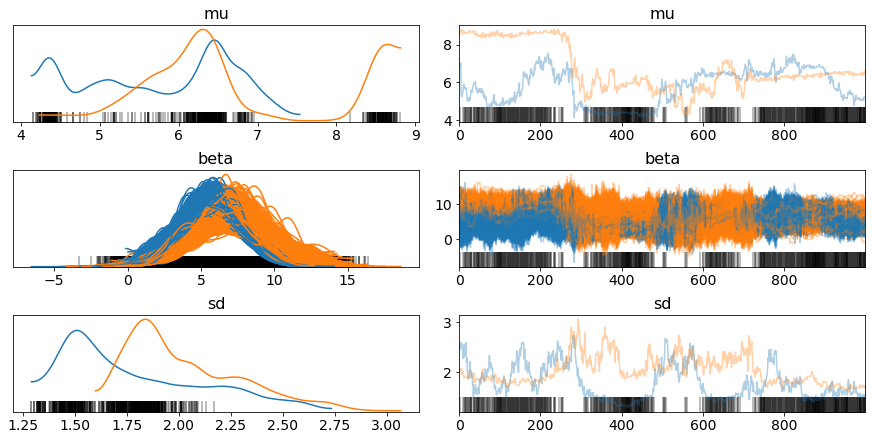

In [25]:
pm.plots.traceplot(trace, compact=True)

In [26]:
estimated_abilities = trace['beta'][-1000:].mean(axis=0)
estimated_abilities_error = trace['beta'][-1000:].std(axis=0)

In [27]:
batter_id_lookup = {v: k for k, v in batter_map.items()}

/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:247: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.xaxis.majorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:248: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.xaxis.minorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:251: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:253: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.

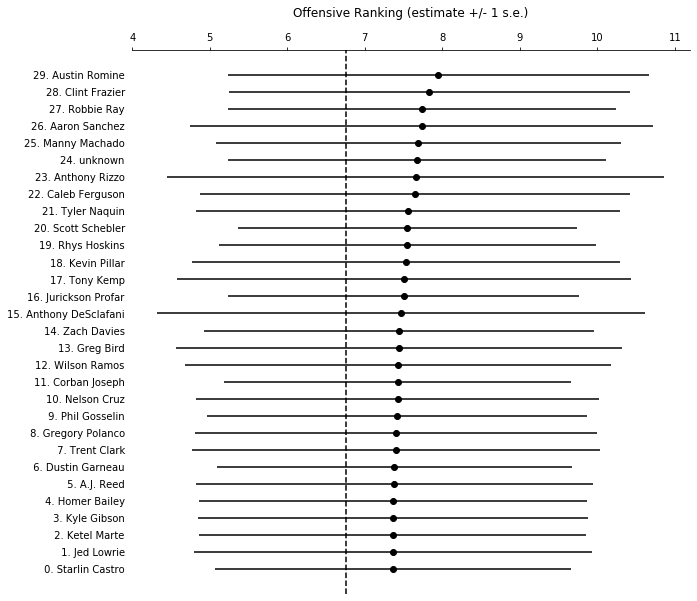

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

limit = 30
n_batters = len(batter_map)
center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([batter_id_lookup[i] for i in range(n_batters)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])[-limit:]
values, labels, errors = zip(*tmp)
labels = [f'{i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Offensive Ranking (estimate +/- 1 s.e.)', y=1.05)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

center_line = np.mean(estimated_abilities)
values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: rankings.set_index('team').loc[x[1], 'score'])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

reverse_team_id_lookup = {v: k for k, v in team_id_lookup.items()}
divisions = json.load(open('divisions.json'))
divisions

def plot_division_rankings(divisions):
    fig, axs = plt.subplots(len(divisions) // 2, 2, figsize=(15, 10))

    for (division, teams), ax in zip(divisions.items(), axs.reshape(-1)):

        team_ids = np.array([reverse_team_id_lookup[team] for team in teams])
        division_abilities = estimated_abilities[team_ids]
        division_error = estimated_abilities_error[team_ids]

        center_line = np.mean(division_abilities)
        values = list(reversed(division_abilities))
        labels = list(reversed([team_id_lookup[id] for id in team_ids]))
        errors = list(reversed(division_error))
        
        tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
        values, labels, errors = zip(*tmp)

        # plot error bars
        ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

        # label the y-axis
        ax.set_yticks(range(len(labels)))
        ax.set_yticklabels(labels, ha='right')
        ax.tick_params(axis='y', which='both', left=False)

        # give it a reference line
        ax.axvline(center_line, linestyle='--', color='k')

        # Move x axis to top
        ax.xaxis.tick_top()

        # polish it off with a title
        _ = ax.set_title(f'{division} Team Quality Estimates', y=1.15)
        
    # remove borders
    sns.despine(left=True, bottom=True, top=False)
    plt.subplots_adjust(
        left  = 0.125,  # the left side of the subplots of the figure
        right = 0.9,    # the right side of the subplots of the figure
        bottom = 0.1,   # the bottom of the subplots of the figure
        top = 0.9,      # the top of the subplots of the figure
        wspace = 0.25,   # the amount of width reserved for space between subplots,
                        # expressed as a fraction of the average axis width
        hspace = 0.8,   # the amount of height reserved for space between subplots,
                        # expressed as a fraction of the average axis height
    )
        
plot_division_rankings(divisions)

In [ ]:
import collections
leagues = collections.defaultdict(list)
for division, teams in divisions.items():
    leagues[division[:3]].extend(teams)
plot_division_rankings(leagues)

# Odds of RedSox winning world series

In [ ]:
dodgers_id, red_sox_id = team_ids['LAD'], team_ids['BOS']

In [ ]:
# team1 @ team2
games = [
    (dodgers_id, red_sox_id),
    (dodgers_id, red_sox_id),
    (red_sox_id, dodgers_id),
    (red_sox_id, dodgers_id),
    (red_sox_id, dodgers_id),
    (dodgers_id, red_sox_id),
    (dodgers_id, red_sox_id),
]
away_team_id, home_team_id = zip(*games)
world_series_n_matchups = np.ones((len(games), 2), dtype=int)
world_series_home_team_id = np.array(home_team_id)
world_series_away_team_id = np.array(away_team_id)

In [ ]:
shared_n_matchups.set_value(world_series_n_matchups)
shared_home_team_id.set_value(world_series_home_team_id)
shared_away_team_id.set_value(world_series_away_team_id)

In [ ]:
ppc = pm.sample_ppc(trace, model=model, samples=100)

In [ ]:
p = ppc['wins']
p.shape

In [ ]:
red_sox_wins = p[:, np.arange(7), [0, 0, 1, 1, 1, 0, 0]]
red_sox_wins.shape

In [ ]:
red_sox_wins

In [ ]:
def simulate():
    ppc = pm.sample_ppc(trace, model=model, samples=100, progressbar=False)
    red_sox_wins = ppc['wins'][:, np.arange(7), [0, 0, 1, 1, 1, 0, 0]]
    red_sox_victory = dodgers_victory = 0
    for series in red_sox_wins:
        w_red_sox = w_dodgers = 0
        for game in series:
            w_red_sox += game
            w_dodgers += 1 - game
            if w_red_sox == 4 or w_dodgers == 4:
                red_sox_victory += int(w_red_sox > w_dodgers)
                dodgers_victory += int(w_dodgers > w_red_sox)
                break
    return red_sox_victory, dodgers_victory

In [ ]:
import tqdm
simulations = np.array([simulate() for _ in tqdm.tqdm_notebook(range(1000))])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
p_red_sox_win = simulations[:, 0] / 100
sns.distplot(p_red_sox_win)

In [ ]:
lb = np.quantile(p_red_sox_win, q=0.025)
median = np.median(p_red_sox_win)
ub = np.quantile(p_red_sox_win, q=0.975)
lb, median, ub

# Acknowledgement and additional resources

This post was particulary inspired by a few of Andrew Gelman's blog posts in which he [ranked world cup teams](https://andrewgelman.com/2014/07/15/stan-world-cup-update/). You can find a Python implementation of his world cup model on my [githup repo](https://github.com/dantegates/world-cup/blob/master/World%20cup.ipynb). The model in this post bears some resemblance to Gelman's world cup model with a few differences noted here

- Gelman models the difference in goals scored by each team in a given game whereas we'll model the number of wins a team earns in a series. Thus our response variables belong to different distributions.
- Gelman uses [FiveThirtyEight](https://fivethirtyeight.com/) soccer rankings in his model as prior. We didn't use rankings in this fashion but we did use FiveThirtyEight's published [Elo](https://en.wikipedia.org/wiki/Elo_rating_system) scores to compare against our learned rankings.

Additionally the data pull and other useful features such as code and evaluations of the model fit were not included in this post to keep it slim. You can find the entire notebook behind this post [here](https://github.com/dantegates/mlb-statcast/blob/master/bayesian-ranking-full.ipynb).